# Decision Tree Classifier

## Import the packages
Let's import the needed packages first.

In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
import pandas as pd
import plotly.express as px
from pydotplus import graph_from_dot_data
from IPython.display import Image
np.set_printoptions(suppress=True)

## Load the data
Now we load the data that is already saved as a CSV file. It's very good practice to check your data before trying to build a model.

In [14]:
df = pd.read_csv('data_decision_trees.csv')
df.head()
#df.Label.unique()

,Feature 01,Feature 02,Feature 03,Feature 04,Feature 05,Feature 06,Feature 07,Label
0,0.269186,2.890367,1.893983,-0.420737,-0.828978,-3.815491,-1.219257,B
1,-1.327319,-1.762721,1.031584,2.766727,-3.174990,-1.395544,-3.284436,D
2,0.107028,3.964838,1.073601,0.758348,1.570392,-0.401011,3.332441,C
3,-2.294776,-3.894267,-0.571486,3.067353,2.892005,-0.235421,-1.292745,A
4,-1.635072,4.305268,0.101267,-5.335998,1.072216,1.286368,4.741389,A


## Visualize the data
One of the other tools for checking our data is visualizing the data. However, our data has more than 3 features, so we cannot directly visualize it (We can directly see only up to 3D). One good way to check for statistical shape of the data is to use a matrix of scatter plots. We can get a feel for the distribution of our data using that.

In [15]:
data_dimensions = df.columns[:-1].to_list()
figure_size = df.shape[1] * 128

fig = px.scatter_matrix(df, dimensions=data_dimensions, color='Label', width=figure_size, height=figure_size)
fig.show()

Now, let's define inputs and outputs for the model.

In [16]:
X = df.drop('Label', axis=1).to_numpy()
y = df['Label'].to_numpy()
print('The shape of X is: {}'.format(X.shape))
print('The shape of y is: {}'.format(y.shape))

The shape of X is: (1870, 7)
The shape of y is: (1870,)


Remeber we emphasized the importance of splitting your data into train, validation and held-out test sets? Let's put that into use. 

Unfortunately, scikit-learn does not have a function to divide the data into three parts, only a function that splits the data into two. So, we are goign to call that function twice, once to split data into two sets: a. training; and b. validation and test combined. Then, we call the function once more to split that second set into distinct validation and test sets. We chose to reserve 0.4 (or 40%) of our data for validation and test and 1 - 0.4 = 0.6 or 60% of our data for training. From the 40% left for validation and test, we are going to use 0.5 or 50% of it (which make sit 20% of the total amount of data) for validation and the other 50% for test.

In [17]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.4, random_state=0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

## Decision Tree Classifier
Now, let's build a decision tree classifier. If everything goes fine, you will see the summary of the model.

In [18]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Visualize the Tree
Now we export the model and represent it as a graph.

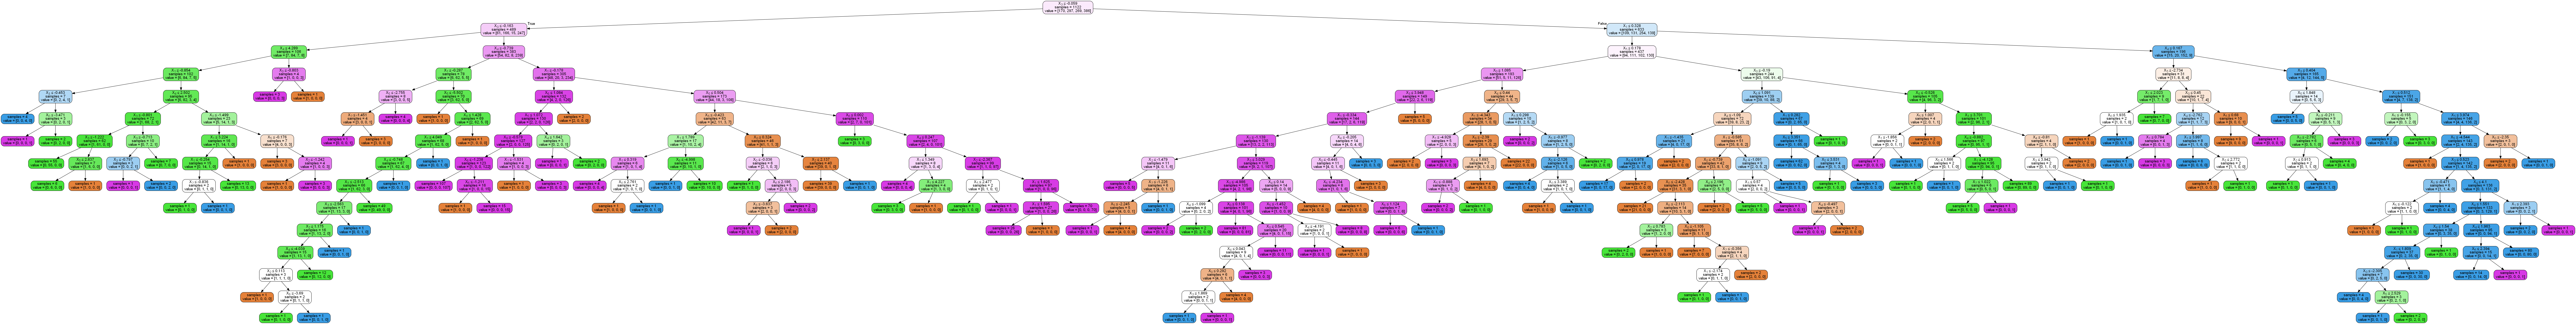

In [22]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, impurity=False, special_characters=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), unconfined=True)

## Model evaluation
Now, we can assess the performance of the classifier.

In [21]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(dtree.score(X_validation, y_validation)))

Accuracy on training set: 1.000
Accuracy on test set: 0.818


The training accuracy of 1.00 is not a good sign. Indeed, this shows that the leaves are pure and the tree was grown deep enough that it could perfectly memorize all the labels on the training data.

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set max_depth=6, meaning only four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set:

In [34]:
dtree1 = DecisionTreeClassifier(max_depth=6)
dtree1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree1.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(dtree1.score(X_validation, y_validation)))

Accuracy on training set: 0.904
Accuracy on validation set: 0.824


That seems better, however a difference between the training and validation accuracy exists. As another alternative, this time let's set a minimum number of samples per leaf, and call your model "dtree2".

In [38]:
# Enter your code here #
print("Accuracy on training set: {:.3f}".format(dtree2.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(dtree2.score(X_validation, y_validation)))

Accuracy on training set: 0.832
Accuracy on validation set: 0.802


At the end, to obtain the final accuracy performance of the model, we use the test data.

In [36]:
print("Accuracy on test set for dtree1: {:.3f}".format(dtree1.score(X_test, y_test)))
print("Accuracy on test set for dtree2: {:.3f}".format(dtree2.score(X_test, y_test)))

Accuracy on test set for dtree1: 0.802
Accuracy on test set for dtree2: 0.770


# Decision Tree Regressor

Again, we import the required packages. You may not know what packages you need at the beginning and can import them wherever needed. Collecting them together just adds to the beauty of your code.

In [90]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

Next, we load and visualize the data, but note that the y-axis is in logarithmic scale.

<IPython.core.display.Javascript object>


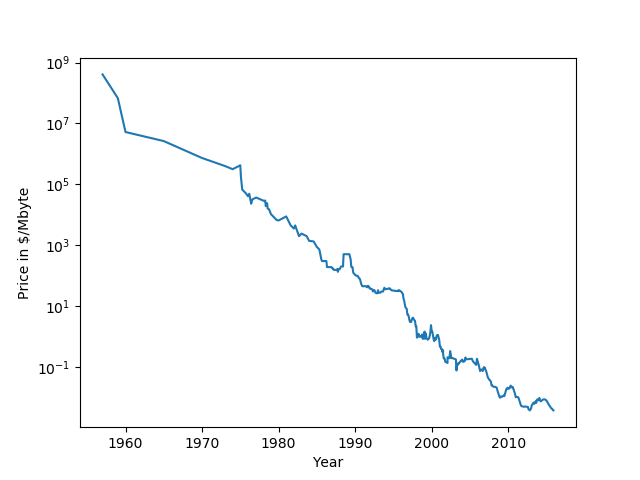

Text(0, 0.5, 'Price in $/Mbyte')

In [91]:
ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

We will make a forecast for the years after 2000 using the historical data up to that point, with the date as our only feature. We will compare two simple models: a DecisionTreeRegressor and LinearRegression. We rescaled the prices using a logarithm, so that the relationship is relatively linear.

In [92]:
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Now, we plot the results and see how they have performed.

<IPython.core.display.Javascript object>


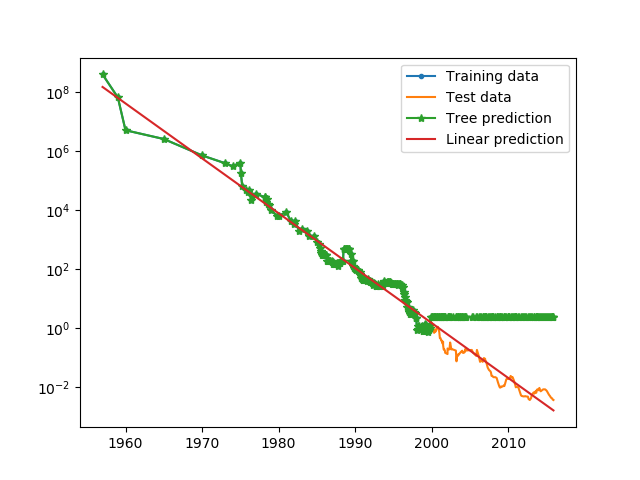

In [98]:
plt.figure()
plt.semilogy(data_train.date, data_train.price, marker='.', label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, marker='*', label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()

# Random Forest Classifier
Let's use the Random Forest Classifier to relax the issue of overfitting in Decision Tree Classifier. First, we import the package and load the data.

In [74]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Label', axis=1).to_numpy()
y = df['Label'].to_numpy()
print('The shape of X is: {}'.format(X.shape))
print('The shape of y is: {}'.format(y.shape))

The shape of X is: (1870, 7)
The shape of y is: (1870,)


Now, we define the RF Classifier by specifying the maximum depth and the number of estimators.

In [81]:
clf_RF = RandomForestClassifier(max_depth=4,n_estimators=200).fit(X,y)
estimator = clf_RF.estimators_[5]

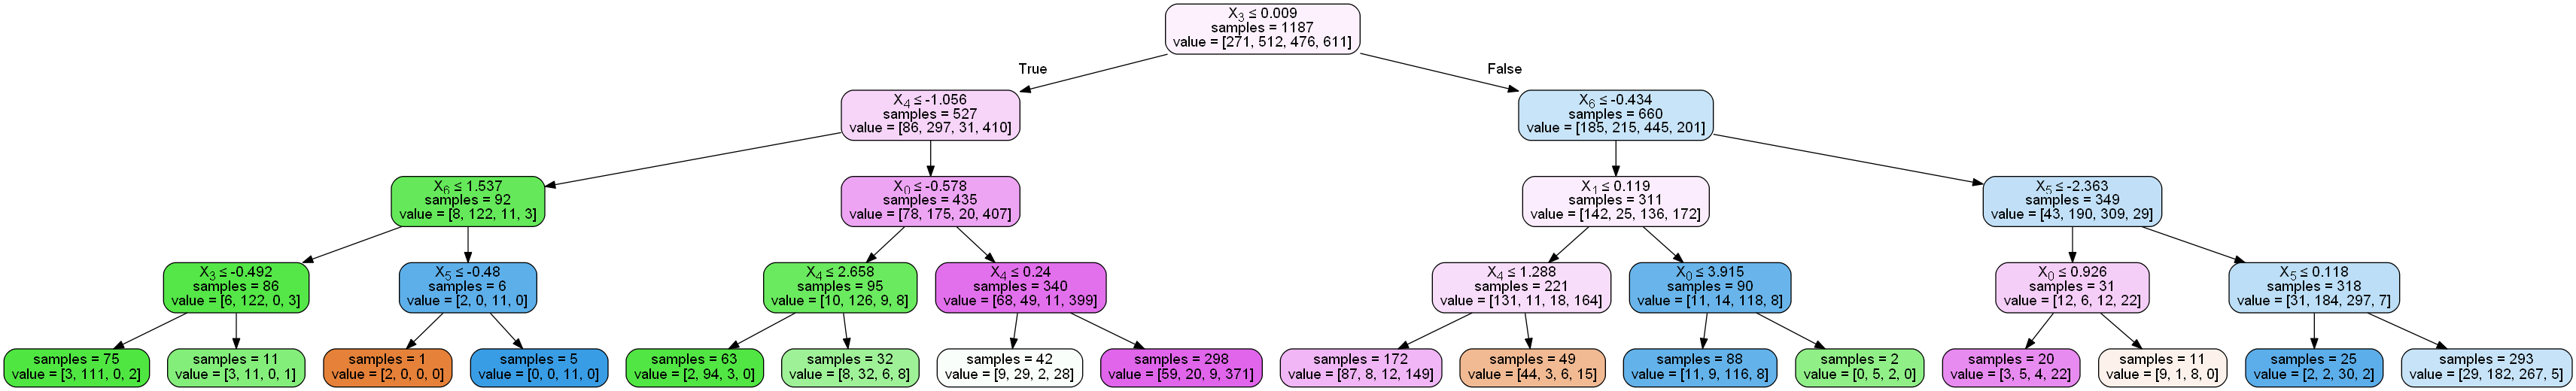

In [82]:
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, filled=True, rounded=True, impurity=False, special_characters=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), unconfined=True)